# JM1 Dataset
**This Dataset is provided by NASA, it is used to predict software defects. The data consists of 21 features descriping the code of the software, and the 22nd feature is the target, whether it has defects or not.**

>***Attribute Information:***
 1. loc                                    : numeric % McCabe's line count of code
 2. v(g)                                  : numeric % McCabe "cyclomatic complexity"
 3. ev(g)                                : numeric % McCabe "essential complexity"
 4. iv(g)                                 : numeric % McCabe "design complexity"
 5. n                                      : numeric % Halstead total operators + operands
 6. v                                       : numeric % Halstead "volume"
 7. l                                        : numeric % Halstead "program length"
 8. d                                      : numeric % Halstead "difficulty"
 9. i                                        : numeric % Halstead "intelligence"
 10. e                                     : numeric % Halstead "effort"
 11. b                                      : numeric % Halstead 
 12. t                                      : numeric % Halstead's time estimator
 13. lOCode                          : numeric % Halstead's line count
 14. lOComment                  : numeric % Halstead's count of lines of comments
 15. lOBlank                          : numeric % Halstead's count of blank lines
 16. lOCodeAndComment  : numeric
 17. uniq_Op                          : numeric % unique operators
 18. uniq_Opnd                     : numeric % unique operands
 19. total_Op                         : numeric % total operators
 20. total_Opnd                    : numeric % total operands
 21. branchCount                 : numeric % of the flow graph
 22. defects                          : {false,true} % module has/has not one or more reported defects

**Source:**<br>
https://www.openml.org/search?type=data&sort=runs&id=1053&status=active 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('jm1_csv.csv')
df.shape

(10885, 22)

In [3]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True


In [4]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [5]:
#converting the target class to 1 and 0 instead of true/false

df['defects'] = df['defects'].astype('float')
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects              float64
dtype: object

In [6]:
# checking for null values
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [7]:
# removing rows with null values
df.dropna(axis = 0, inplace = True)

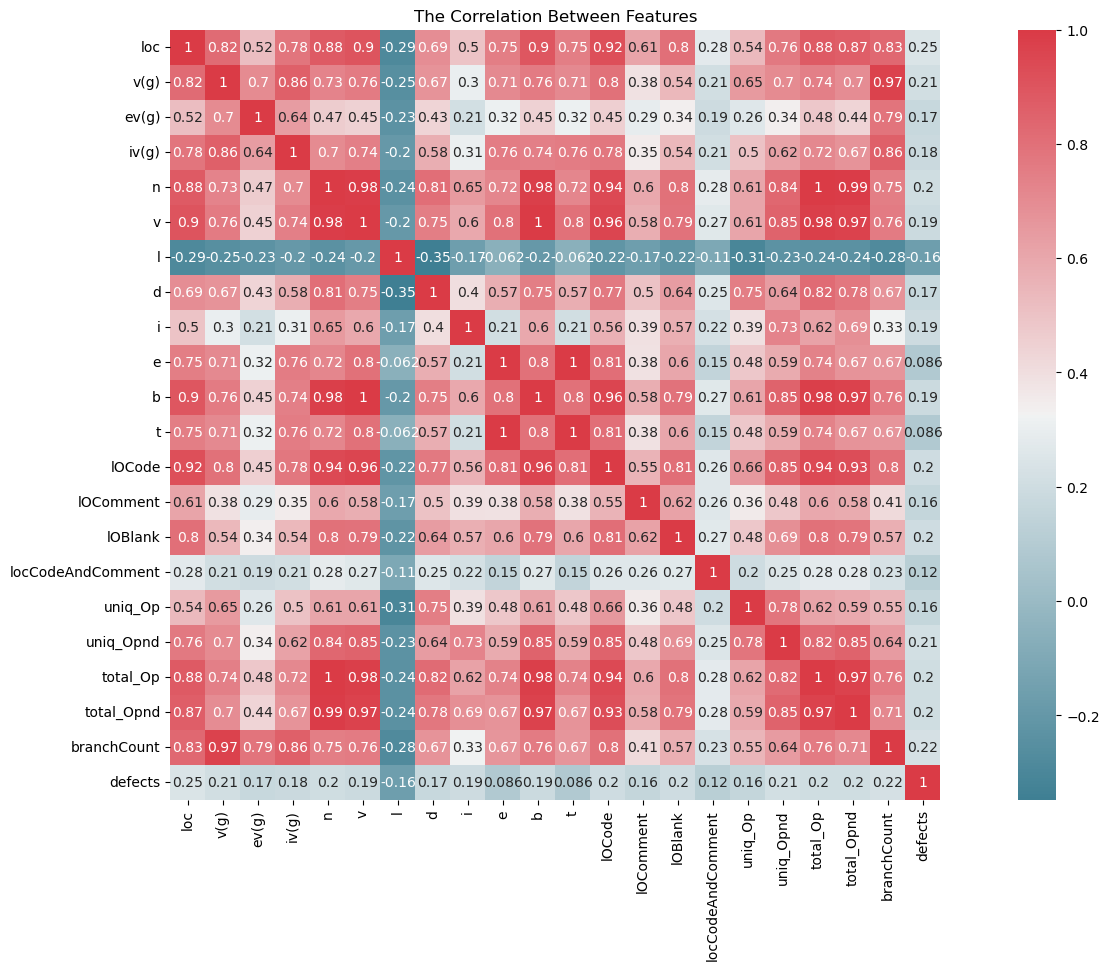

In [8]:
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True, square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

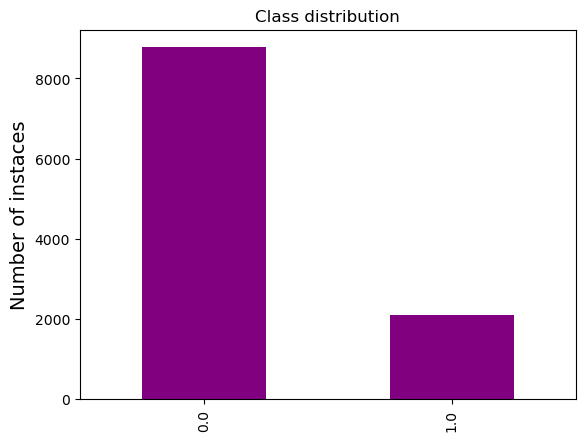

0.0    8777
1.0    2103
Name: defects, dtype: int64


In [9]:
# counting how many instances in each class
classDist = df['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

# printing the exact number of instances in each class
print (df['defects'].value_counts())

In [10]:
# spplitting the data into features and target class

x = df.iloc[:,:-1]
y=df['defects']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 8704 samples.
Testing set has 2176 samples.


In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Handling data imbalance
**Since our class distribution is very skewd, this may affect the results of the models, therfore, we will perform upsampling to solve this by taking as many instances of the minority class as much as the majority class, to make it balanced.**

In [13]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x, y, test_size = 0.2, random_state=42)
# concatenate training data back together
train = pd.concat([x_train2, y_train2], axis=1)

# separate minority and majority classes
not_defected = train[train.defects==0]
defected = train[train.defects==1]

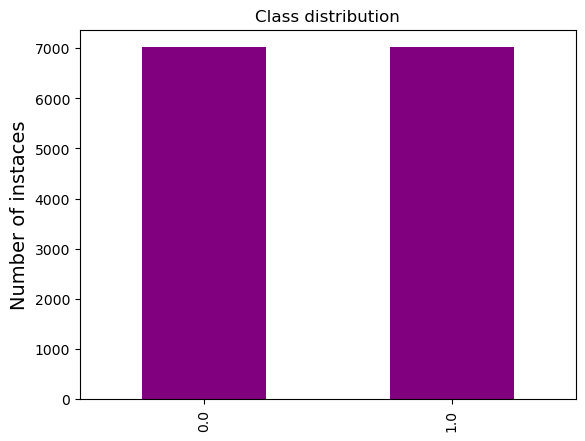

In [14]:
# upsample minority
defected_upsampled = resample(defected,
                          replace=True,
                          n_samples=len(not_defected), # match number in majority class
                          random_state=42) # reproducible results

upsampled = pd.concat([not_defected, defected_upsampled])
# check new class distribution
classDist = upsampled['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

In [15]:
upsampled.shape

(14040, 22)

In [16]:
upsampled.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
5528,4.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,38.77,...,2,0,0,0,5.0,1.0,5.0,1.0,1.0,0.0
8694,13.0,3.0,1.0,1.0,29.0,123.19,0.08,11.92,10.34,1468.01,...,8,1,1,0,13.0,6.0,18.0,11.0,5.0,0.0
10794,24.0,3.0,1.0,2.0,53.0,236.35,0.10,10.50,22.51,2481.67,...,19,0,3,0,11.0,11.0,32.0,21.0,5.0,0.0
4954,65.0,16.0,1.0,6.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,31.0,0.0
6181,33.0,10.0,1.0,7.0,142.0,739.74,0.03,30.59,24.18,22627.41,...,26,0,5,0,20.0,17.0,90.0,52.0,19.0,0.0


In [ ]:
# exporting the new clean dataset to a csv file to be used in training the networks

from pathlib import Path  
filepath = Path(f'./newDataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
upsampled.to_csv(filepath)  